In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
df=pd.read_csv("/kaggle/input/titanic/train.csv")

In [36]:
#df_test=pd.read_csv("/kaggle/input/titanic/test.csv")

In [37]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [39]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [40]:
df.fillna({'Age':df['Age'].median()},inplace=True)

In [41]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [43]:
df.dropna(subset=['Embarked'],inplace=True)

In [44]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [45]:
df_final=df.drop('Cabin',axis=1)

In [46]:
df_final

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [47]:
df_final.select_dtypes(include=['number']).corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,0.031319,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,-0.069822,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,-0.336512,0.081656,0.016824,-0.548193
Age,0.031319,-0.069822,-0.336512,1.000000,-0.232543,-0.171485,0.093707
SibSp,-0.057686,-0.034040,0.081656,-0.232543,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,-0.171485,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,0.093707,0.160887,0.217532,1.000000


<Axes: xlabel='Embarked', ylabel='count'>

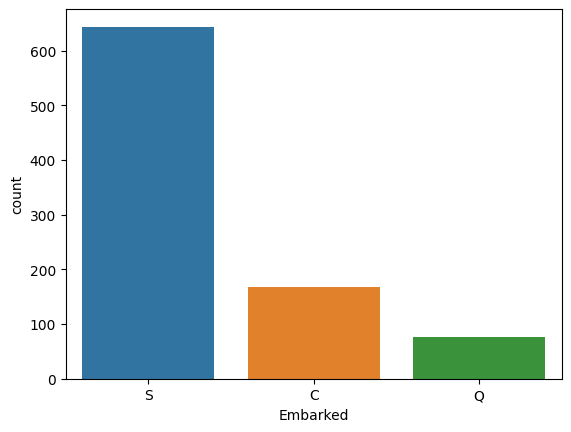

In [48]:
sns.countplot(data=df,x='Embarked')

<Axes: xlabel='Survived', ylabel='count'>

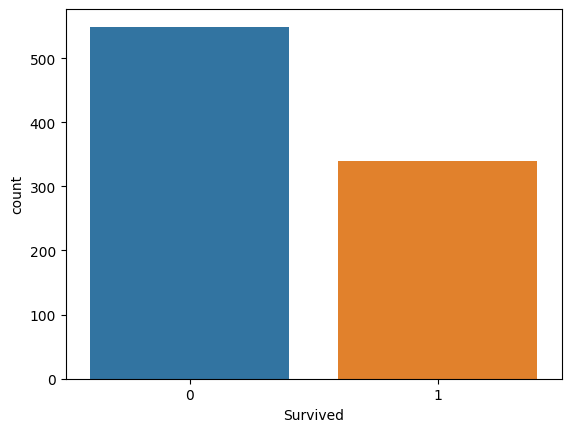

In [49]:
sns.countplot(data=df_final,x='Survived')

(array([ 54.,  46., 177., 346., 117.,  70.,  45.,  23.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

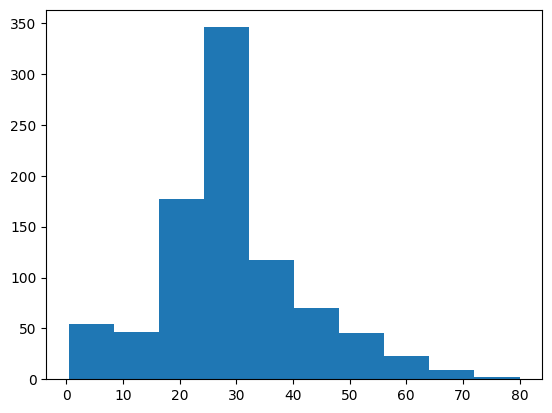

In [50]:
plt.hist(df_final['Age'],bins=10)

In [51]:
df['Fare'].max()

512.3292

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Text(0, 0.5, 'Survivors')

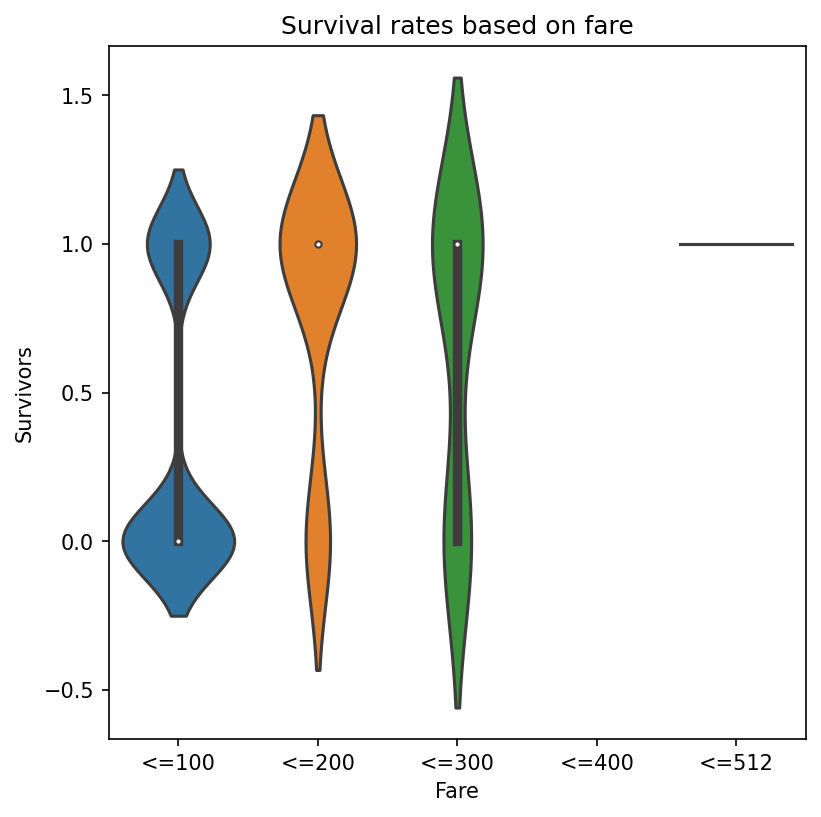

In [52]:
plt.figure(figsize=(6,6),dpi=150)
fare_bins=[0.0,100,200,300,400,512.3292]
fare_labels=['<=100','<=200','<=300','<=400','<=512']
df_final['Fare_bins']=pd.cut(df_final['Fare'],bins=fare_bins,labels=fare_labels,include_lowest=True)
sns.violinplot(data=df_final,x='Fare_bins',y='Survived')
plt.title('Survival rates based on fare')
plt.xlabel('Fare')
plt.ylabel('Survivors')

Text(0.5, 1.0, 'Correlation Matrix')

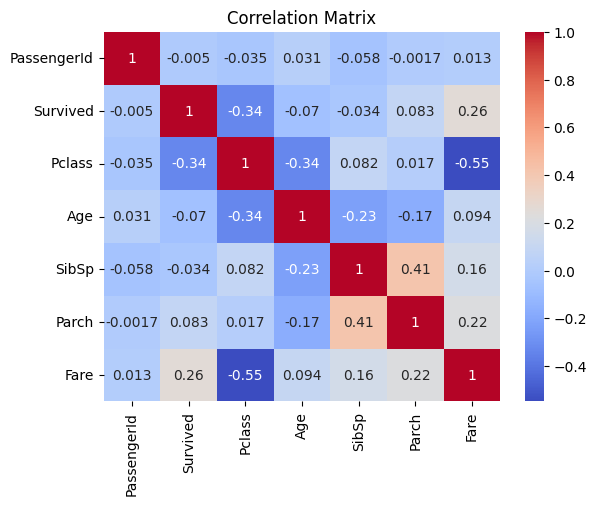

In [53]:
sns.heatmap(df.select_dtypes(['number']).corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')

In [54]:
df_final.describe(include=['number'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [55]:
df_final=df_final.set_index('PassengerId')

In [56]:
df_final.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_bins
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,<=100
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,<=100
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,<=100
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,<=100
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,<=100


In [57]:
df_final['FamilyMembers']=df_final['SibSp']+df_final['Parch']

In [58]:
df_final.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_bins,FamilyMembers
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,<=100,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,<=100,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,<=100,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,<=100,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,<=100,0


<Axes: xlabel='Sex', ylabel='Survived'>

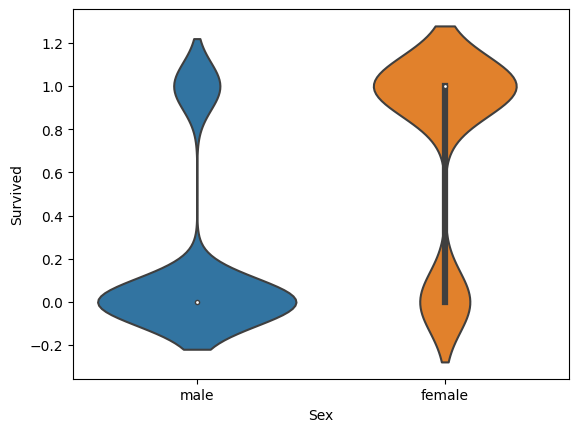

In [59]:
sns.violinplot(data=df_final,x='Sex',y='Survived')

In [60]:
df_final.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'Fare_bins', 'FamilyMembers'],
      dtype='object')

<Axes: xlabel='Sex', ylabel='count'>

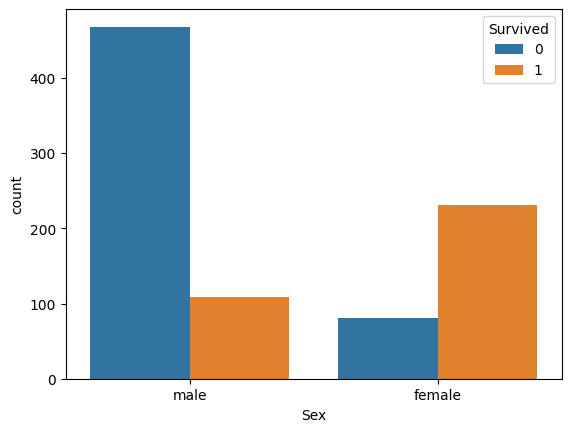

In [61]:
sns.countplot(data=df_final,x='Sex',hue='Survived')

In [62]:
df_final.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_bins,FamilyMembers
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,<=100,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,<=100,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,<=100,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,<=100,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,<=100,0


In [71]:
df2=df_final.drop(columns=['SibSp','Parch','Name','Ticket'],axis=1)

In [72]:
df2.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Fare_bins,FamilyMembers
PassengerId,,,,,,,,
1,0,3,male,22.0,7.2500,S,<=100,1
2,1,1,female,38.0,71.2833,C,<=100,1
3,1,3,female,26.0,7.9250,S,<=100,0
4,1,1,female,35.0,53.1000,S,<=100,1
5,0,3,male,35.0,8.0500,S,<=100,0


Let's perform outlier detection

Points lying far away from the clusters can be considered as outliers

In [73]:
df2['FamilyMembers'].value_counts()

FamilyMembers
0     535
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: count, dtype: int64

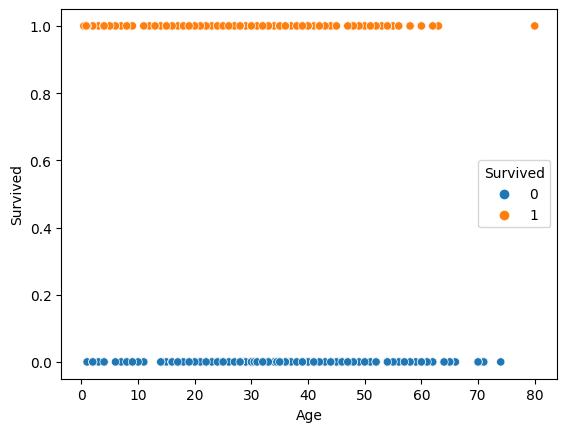

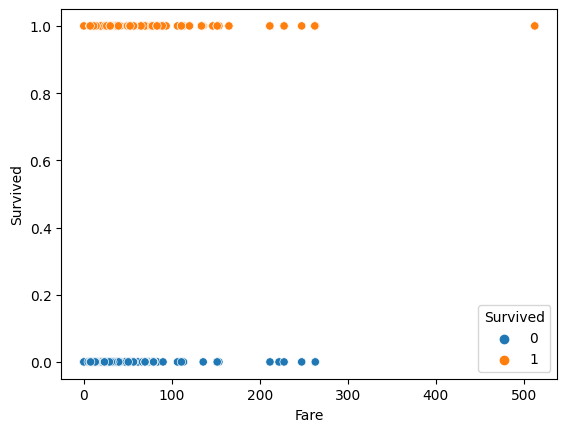

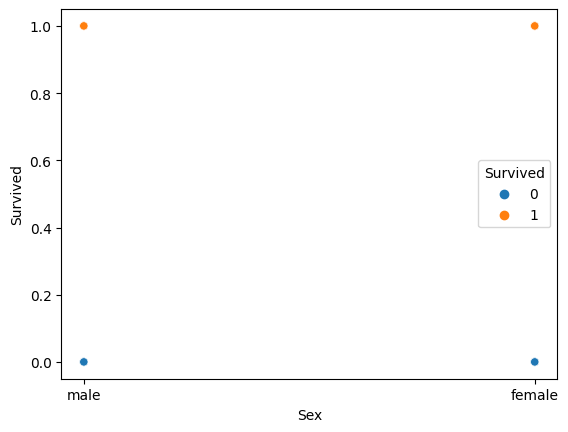

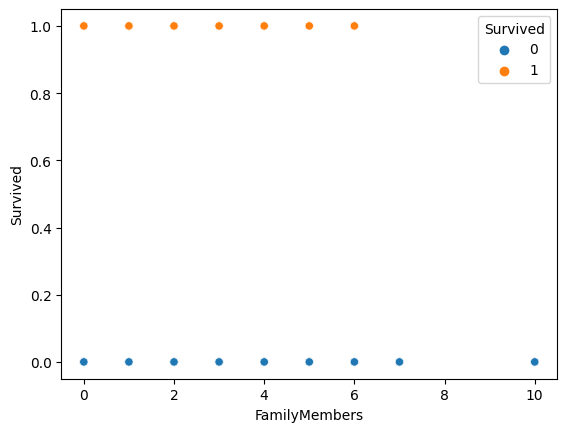

In [74]:
for column in ['Age','Fare','Sex','FamilyMembers']:
    sns.scatterplot(data=df2,x=column,y='Survived',hue='Survived')
    plt.show()

If there are very few outliers so we can ignore them as they won't affect the model fitting too much

In [81]:
#Calculating IQR

Q1 = df2['Age'].quantile(0.25)
Q3 = df2['Age'].quantile(0.75)
IQR = Q3-Q1
IQR

13.0

In [82]:
#outlier bounds 
lower_bound = Q1 - 0.25*IQR
upper_bound = Q3 + 0.75*IQR

In [83]:
outliers = df2[(df2['Age']<lower_bound) | (df2['Age']>upper_bound)]
print(outliers)

             Survived  Pclass     Sex   Age     Fare Embarked Fare_bins  \
PassengerId                                                               
7                   0       1    male  54.0  51.8625        S     <=100   
8                   0       3    male   2.0  21.0750        S     <=100   
10                  1       2  female  14.0  30.0708        C     <=100   
11                  1       3  female   4.0  16.7000        S     <=100   
12                  1       1  female  58.0  26.5500        S     <=100   
...               ...     ...     ...   ...      ...      ...       ...   
870                 1       3    male   4.0  11.1333        S     <=100   
872                 1       1  female  47.0  52.5542        S     <=100   
874                 0       3    male  47.0   9.0000        S     <=100   
876                 1       3  female  15.0   7.2250        C     <=100   
880                 1       1  female  56.0  83.1583        C     <=100   

             FamilyMembe

In [85]:
df2.shape

(889, 8)

That method for outlier detection doesn't seem good....

In [102]:
df2.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Fare_bins,FamilyMembers
PassengerId,,,,,,,,
1,0,3,male,22.0,7.2500,S,<=100,1
2,1,1,female,38.0,71.2833,C,<=100,1
3,1,3,female,26.0,7.9250,S,<=100,0
4,1,1,female,35.0,53.1000,S,<=100,1
5,0,3,male,35.0,8.0500,S,<=100,0


In [106]:
df2.drop(columns = ['Fare_bins'],axis = 1, inplace = True)

In [107]:
df2.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilyMembers
PassengerId,,,,,,,
1,0,3,male,22.0,7.2500,S,1
2,1,1,female,38.0,71.2833,C,1
3,1,3,female,26.0,7.9250,S,0
4,1,1,female,35.0,53.1000,S,1
5,0,3,male,35.0,8.0500,S,0


In [108]:
df3= pd.get_dummies(data = df2, columns = ['Sex','Embarked'], drop_first = True).astype(int)

In [109]:
df3.head()

,Survived,Pclass,Age,Fare,FamilyMembers,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,
1,0,3,22,7,1,1,0,1
2,1,1,38,71,1,0,0,0
3,1,3,26,7,0,0,0,1
4,1,1,35,53,1,0,0,1
5,0,3,35,8,0,1,0,1


In [110]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [111]:
df3.head()

,Survived,Pclass,Age,Fare,FamilyMembers,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,
1,0,3,22,7,1,1,0,1
2,1,1,38,71,1,0,0,0
3,1,3,26,7,0,0,0,1
4,1,1,35,53,1,0,0,1
5,0,3,35,8,0,1,0,1


In [112]:
X = df3.drop(columns=['Survived'],axis = 1)

In [113]:
Y = df3['Survived']

In [114]:
df3.head()

,Survived,Pclass,Age,Fare,FamilyMembers,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,
1,0,3,22,7,1,1,0,1
2,1,1,38,71,1,0,0,0
3,1,3,26,7,0,0,0,1
4,1,1,35,53,1,0,0,1
5,0,3,35,8,0,1,0,1


In [115]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=101)

In [116]:
scaler = StandardScaler()

In [118]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled= scaler.fit_transform(X_test)

In [119]:
svc=SVC(C=0.7,kernel='rbf',gamma= 'auto',max_iter = 1000)
rf=RandomForestClassifier(n_estimators = 100, criterion = 'gini')

In [124]:
svc.fit(X_train_scaled,Y_train)

SVC(C=0.7, gamma='auto', max_iter=1000)

In [125]:
y_pred_svc = svc.predict(X_test_scaled)

In [132]:
print("SVC:")
print("Accuracy Score:",accuracy_score(Y_test,y_pred_svc))
print(classification_report(Y_test,y_pred_svc))

SVC:
Accuracy Score: 0.8314606741573034
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       163
           1       0.90      0.63      0.75       104

    accuracy                           0.83       267
   macro avg       0.85      0.80      0.81       267
weighted avg       0.84      0.83      0.82       267



In [123]:
rf.fit(X_train,Y_train) #no scaling required

RandomForestClassifier()

In [127]:
y_pred_rf = rf.predict(X_test)

In [131]:
print("RandomForestClassifier:")
print("Accuracy Score:",accuracy_score(Y_test,y_pred_rf))
print(classification_report(Y_test,y_pred_rf))

RandomForestClassifier:
Accuracy Score: 0.797752808988764
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       163
           1       0.75      0.72      0.74       104

    accuracy                           0.80       267
   macro avg       0.79      0.78      0.79       267
weighted avg       0.80      0.80      0.80       267



SVC performs better

In [133]:
from joblib import dump

In [134]:
dump(svc,'SupportVectorClassifier_Titanic')

['SupportVectorClassifier_Titanic']